In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Regressão linear com uma variável

## Extração de data 1.

In [2]:
external_data_1 = pd.read_csv("data1.txt",header=0,names=["Populacao", "Lucro"])
print(external_data_1)

    Populacao     Lucro
0      5.5277   9.13020
1      8.5186  13.66200
2      7.0032  11.85400
3      5.8598   6.82330
4      8.3829  11.88600
..        ...       ...
91     5.8707   7.20290
92     5.3054   1.98690
93     8.2934   0.14454
94    13.3940   9.05510
95     5.4369   0.61705

[96 rows x 2 columns]


## Visualição dos Dados Extraídos

Text(0, 0.5, 'Lucro do Foodtruck')

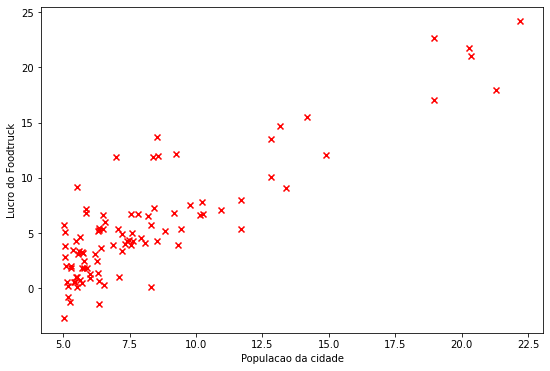

In [3]:
figure = plt.figure(figsize=(9,6))
plt.scatter(external_data_1['Populacao'], external_data_1['Lucro'], c='r', marker='x')
plt.xlabel('Populacao da cidade')
plt.ylabel('Lucro do Foodtruck')

## Função Custo e Regressão Linear.

In [4]:
from numpy import random

x = external_data_1['Populacao'].values
y = external_data_1['Lucro'].values

theta_0 = random.random()
theta_1 = random.random()

learning_rate = 0.01
interations = 1000
dim = len(external_data_1)

hypotesis_function = theta_0 + theta_1*x
cost_function = []

for interation in range(interations):
    err = 0
    err_2 = 0
    for j in range(dim):
        err = hypotesis_function[j] - y[j]
        theta_0 = theta_0 - learning_rate*(1/dim)*err
        theta_1 = theta_1 - learning_rate*(1/dim)*err*x[j]
        err_2 = err_2+err**2 
        
    hypotesis_function = theta_0 + theta_1*x
    cost_function.append(1/(2*dim)*err_2)
  

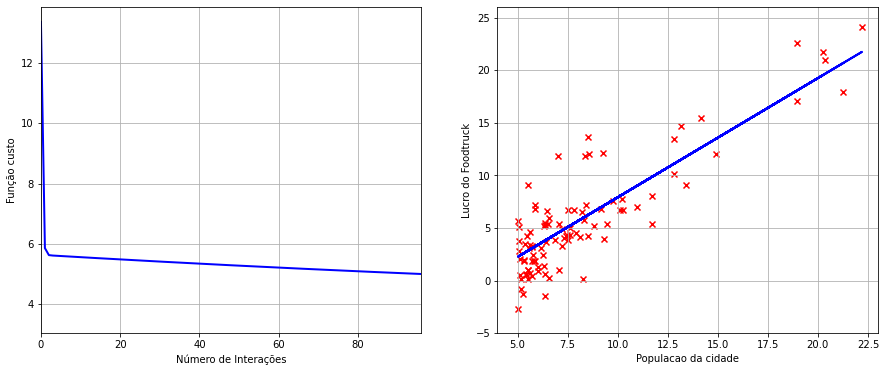

In [5]:
figure = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(np.arange(interations), cost_function, c='blue', linewidth=2 )
plt.xlabel('Número de Interações')
plt.ylabel('Função custo')
plt.xlim(0, len(external_data_1))
plt.grid(True)

plt.subplot(122)
plt.scatter(external_data_1['Populacao'], external_data_1['Lucro'], c='r', marker='x')
plt.plot(external_data_1['Populacao'], hypotesis_function, c='blue', linewidth=2 )
plt.xlabel('Populacao da cidade')
plt.ylabel('Lucro do Foodtruck')
plt.xlim(4, 23)
plt.ylim(-5, 26)
plt.grid(True)

    

## Outra forma de calcular a Regressão Linear.

Text(0, 0.5, 'Lucro do Foodtruck')

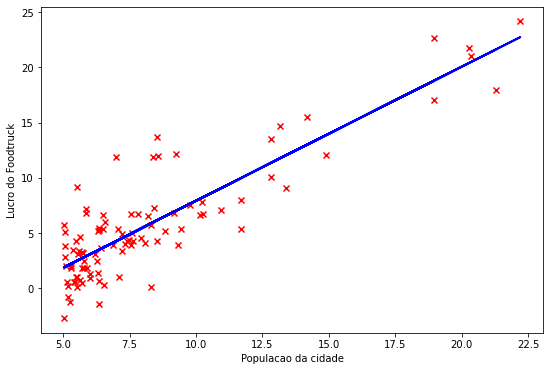

In [6]:
from sklearn.linear_model import LinearRegression

reg_values_x = external_data_1['Populacao'].values.reshape(-1,1)
reg_values_y = external_data_1['Lucro'].values.reshape(-1,1)

regression_function = LinearRegression()
regression_function.fit(reg_values_x, reg_values_y)

predictions = regression_function.predict(reg_values_x)

figure = plt.figure(figsize=(9,6))
plt.scatter(external_data_1['Populacao'], external_data_1['Lucro'], c='r', marker='x' )
plt.plot(external_data_1['Populacao'], predictions, c='b', linewidth=2)
plt.xlabel('Populacao da cidade')
plt.ylabel('Lucro do Foodtruck')

# Regressão linear múltiplas variáveis.

## Extração de data 2.

In [7]:
external_data_2 = pd.read_csv("data2.txt", header=0, names=["Tamanho", "Quarto", "Preco"])
print(external_data_2)

    Tamanho  Quarto   Preco
0      1600       3  329900
1      2400       3  369000
2      1416       2  232000
3      3000       4  539900
4      1985       4  299900
5      1534       3  314900
6      1427       3  198999
7      1380       3  212000
8      1494       3  242500
9      1940       4  239999
10     2000       3  347000
11     1890       3  329999
12     4478       5  699900
13     1268       3  259900
14     2300       4  449900
15     1320       2  299900
16     1236       3  199900
17     2609       4  499998
18     3031       4  599000
19     1767       3  252900
20     1888       2  255000
21     1604       3  242900
22     1962       4  259900
23     3890       3  573900
24     1100       3  249900
25     1458       3  464500
26     2526       3  469000
27     2200       3  475000
28     2637       3  299900
29     1839       2  349900
30     1000       1  169900
31     2040       4  314900
32     3137       3  579900
33     1811       4  285900
34     1437       3 

## Normalização das características pela média e desvio.

In [8]:
length_mean = np.mean(external_data_2['Tamanho'])
room_mean = np.mean(external_data_2['Quarto'])
price_mean = np.mean(external_data_2['Preco'])

std_length = np.std(external_data_2['Tamanho'])
std_room = np.std(external_data_2['Quarto'])
std_price = np.std(external_data_2['Preco'])

new_values_length = (external_data_2['Tamanho'] - length_mean)/std_length
new_values_room = (external_data_2['Quarto'] - room_mean)/std_room
new_values_price = (external_data_2['Preco'] - price_mean)/std_price


## Função Custo e Regressão Linear.

In [9]:
from numpy import random

x1 = new_values_length
x2 = new_values_room
x3 = new_values_price

th_0 = random.random()
th_1 = random.random()
th_2 = random.random()

learning_rate_2 = 0.01
epoch = 1000
n_dim = len(external_data_2)

hypotesis_function_2 = th_0 + th_1*x1 + th_2*x3 
cost_function_2 = []

for interation in range(epoch):
    n_err = 0
    n_err_2 = 0
    for j in range(len(external_data_2)):
        n_err = hypotesis_function_2[j] - x2[j]
        th_0 = th_0 - learning_rate*(1/n_dim)*n_err*1
        th_1 = th_1 - learning_rate*(1/n_dim)*n_err*x1[j]
        th_2 = th_2 - learning_rate*(1/n_dim)*n_err*x3[j]
        n_err_2 = n_err_2+n_err**2 
        
    hypotesis_function_2 = th_0 + th_1*x2 + th_2*x3
    cost_function_2.append(1/(2*len(external_data_2))*n_err_2)
    


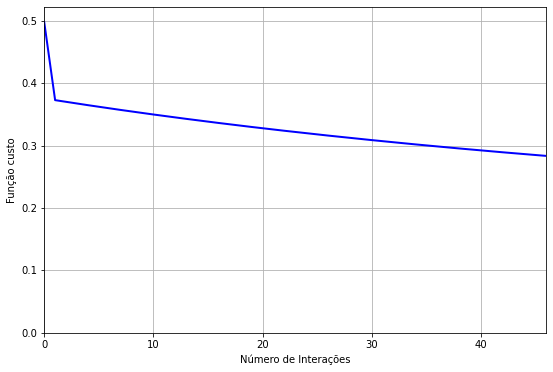

In [10]:
figure = plt.figure(figsize=(9,6))
plt.plot(np.arange(epoch), cost_function_2, c='blue', linewidth=2 )
plt.xlabel('Número de Interações')
plt.ylabel('Função custo')
plt.xlim(0, len(external_data_2))
plt.grid(True)


## Por que não é possível fazer uma regressão linear?

Pelo fato da existência de mais de duas dimensão os dados não se correlacionam em um plano cartesiano bi-demensional, uma maneira de projetarmos uma regressão linear é usando uma correção polinomial, que pode ser feita adicionando uma característica ou seja, elevando um dos termos ao quadrado ou, nesse problema em questão, promover uma combinação linear entre dois valores na hipótese, do tipo x1*x2. Vale ressaltar, que a escolha desses dados assim normalizados se torna arbitrária e os valores de saída podem se diferir consideravelmente e outro fato, não menos importante, é que no problema em questão foi utilizado x1 (tamanho) e x3 (preço) como multiplicadores de tetas, a escolha de outros como x2(quantidade de quartos) podem ocasionar uma diferente resposta. 

## Tentativa gráfica da correção polinomial

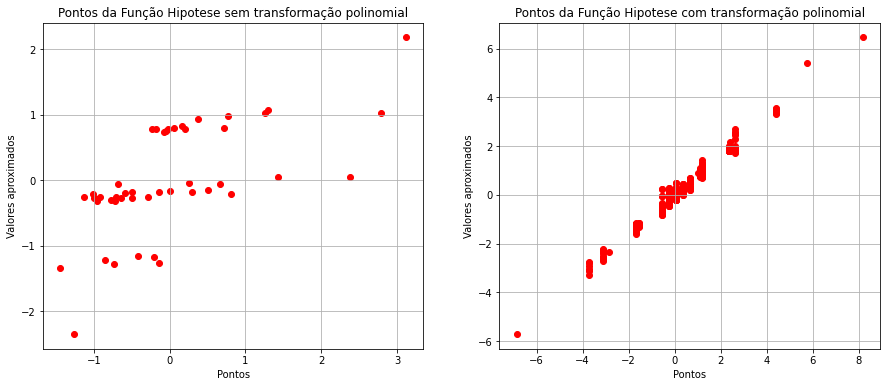

In [11]:
from sklearn.preprocessing import PolynomialFeatures

c_x2_x3 = np.matrix([x2, x3])
c_x1_x2 = np.matrix([x1, x2])

PolyFeat = PolynomialFeatures(degree=2)
x2_x3_poly = PolyFeat.fit_transform(c_x2_x3)
x1_x2_poly = PolyFeat.fit_transform(c_x1_x2)

new_hypotesis_function_2 = th_0 + th_1*x1_x2_poly[1] + th_2*x2_x3_poly[1]

figure = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title("Pontos da Função Hipotese sem transformação polinomial")
plt.scatter(x1, hypotesis_function_2, c='r')
plt.xlabel('Pontos')
plt.ylabel('Valores aproximados')
plt.grid(True)

plt.subplot(122)
plt.title("Pontos da Função Hipotese com transformação polinomial")
plt.scatter(x2_x3_poly[0], new_hypotesis_function_2, c='r')
plt.xlabel('Pontos')
plt.ylabel('Valores aproximados')
plt.grid(True)


## Usando a Equação Normal 

In [55]:
x_matrix = np.matrix([external_data_2['Tamanho'], external_data_2['Quarto'], external_data_2['Preco']])
mult_x_matrix = np.dot(x_matrix.T, x_matrix)
 

inv_matrix = np.linalg.inv(mult_x_matrix)
eq_normal = np.dot(inv_matrix, x_matrix.T)
y = np.random.rand(3,2)
desgraça = np.dot(eq_normal,y)
print(desgraça.T)

[[ 0.34829199 -0.19318335  0.28658706 -0.00423679  0.21523145  0.16804649
   0.05314001 -0.34630945 -0.04881497 -0.20134984 -0.18064721 -0.21099661
  -0.07781666 -0.29708237 -0.08267186 -0.09807522  0.24605762 -0.00742819
  -0.07854615 -0.0778441   0.06274642  0.20087604  0.02872761  0.06099429
  -0.04257663  0.08065366 -0.07817684  0.01325837 -0.1280207  -0.2846413
   0.16136126  0.1641654   0.13753935 -0.19230999 -0.318193    0.13627432
  -0.11689406  0.10292908  0.23933111  0.04322473 -0.33422875  0.15750943
   0.1280286  -0.23367235  0.50572215  0.16804103]
 [ 0.21859085 -0.12157884  0.1801189  -0.00262841  0.13514466  0.1054853
   0.03341872 -0.21752267 -0.03059311 -0.12631494 -0.11331242 -0.13254238
  -0.04882327 -0.18653314 -0.05190412 -0.06158428  0.15451718 -0.00468254
  -0.04937495 -0.04882456  0.03967347  0.12609167  0.01816302  0.03827907
  -0.026796    0.05066907 -0.04910962  0.00827437 -0.08034404 -0.17867315
   0.1013027   0.10302587  0.0863427  -0.12078336 -0.19977042  